In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [116]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np

In [117]:
from sklearn.preprocessing import OneHotEncoder

In [149]:
X ,y=make_blobs(n_samples=10000,centers=4,random_state=42)

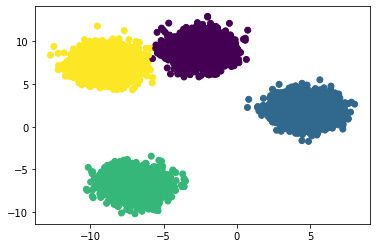

In [150]:
plt.scatter(X[:,0],X[:,1],c=y)

In [151]:
y_hot=OneHotEncoder().fit_transform(y.reshape(-1,1)).todense()

In [152]:
y_hot[:10],y[:10]

(matrix([[1., 0., 0., 0.],
         [0., 0., 1., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 1., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [0., 0., 0., 1.],
         [0., 0., 1., 0.]]),
 array([0, 2, 1, 2, 2, 1, 0, 0, 3, 2]))

In [153]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [154]:
model=Sequential()

In [155]:
model.add(Dense(5 , input_shape=(2,),activation="sigmoid",name="L1"))  ## input is 2 because our X has 2 input from bloobs
model.add(Dense(4,activation="softmax",name="F1"))       ### 4 are given beacuse 4 is our output

In [156]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 5)                 15        
_________________________________________________________________
F1 (Dense)                   (None, 4)                 24        
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [157]:
model.compile(optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [162]:
outcome=model.fit(X_train,y_train,epochs=10)

Train on 6700 samples
Epoch 1/10
6700/6700 [==============================] - 0s 34us/sample - loss: 0.1815 - accuracy: 0.9994
Epoch 2/10
6700/6700 [==============================] - 0s 31us/sample - loss: 0.1572 - accuracy: 0.9994
Epoch 3/10
6700/6700 [==============================] - 0s 31us/sample - loss: 0.1370 - accuracy: 0.9996
Epoch 4/10
6700/6700 [==============================] - 0s 31us/sample - loss: 0.1201 - accuracy: 0.9996
Epoch 5/10
6700/6700 [==============================] - 0s 33us/sample - loss: 0.1057 - accuracy: 0.9997
Epoch 6/10
6700/6700 [==============================] - 0s 33us/sample - loss: 0.0935 - accuracy: 0.9997
Epoch 7/10
6700/6700 [==============================] - 0s 31us/sample - loss: 0.0830 - accuracy: 0.9997
Epoch 8/10
6700/6700 [==============================] - 0s 35us/sample - loss: 0.0739 - accuracy: 0.9997
Epoch 9/10
6700/6700 [==============================] - 0s 31us/sample - loss: 0.0660 - accuracy: 0.9997
Epoch 10/10
6700/6700 [==========

In [159]:
model.evaluate(X_test,y_test,verbose=0)

[0.19618321819738907, 0.9990909]

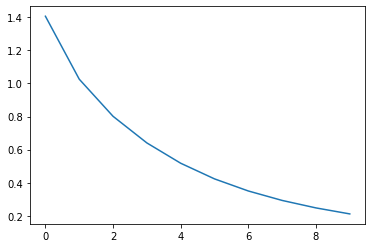

In [160]:
plt.plot(outcome.history["loss"])

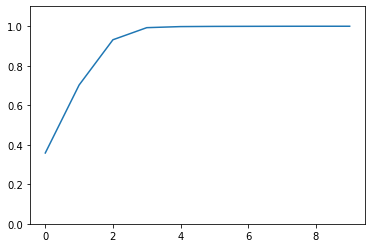

In [161]:
plt.figure()
plt.plot(outcome.history["accuracy"])
plt.ylim(0,1.1)
plt.show()